## 1) Delivery_time -> Predict delivery time using sorting time 

In [3]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# load the data set delivery_time.csv
df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
df = df.rename({'Delivery Time':'Delivery_time','Sorting Time':'Sorting_time'}, axis = 1)

In [6]:
# basic info about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_time  21 non-null     float64
 1   Sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [7]:
df.shape

(21, 2)

In [8]:
df.describe()

,Delivery_time,Sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


## Check Correlation between numeric independent features

In [9]:
df.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


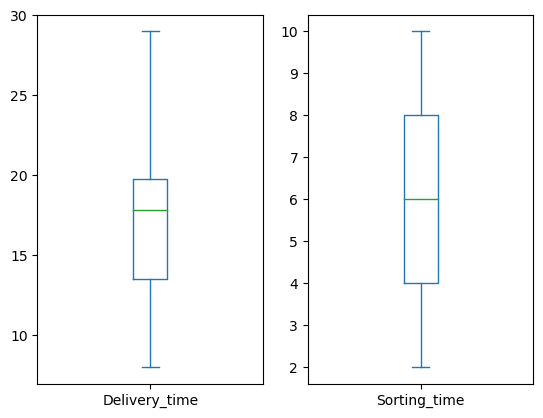

In [10]:
# checking for outlier by univarite analysis
df.plot(kind = 'box' , subplots = True);

# From the above we can say that there are no outliers in the data

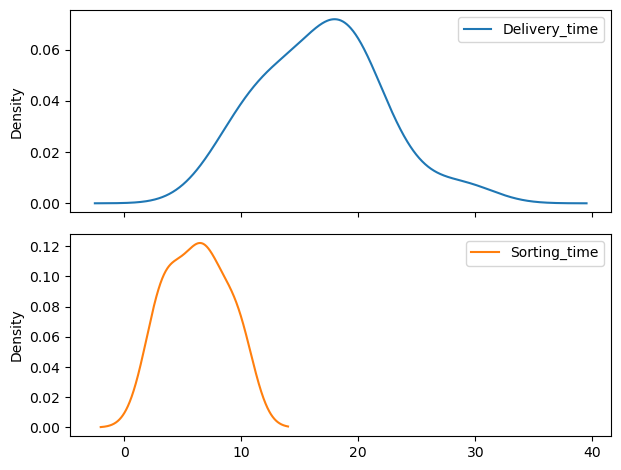

In [11]:
df.plot(kind = 'kde' , subplots = True)
plt.tight_layout();

## Fit a Simple Linear Regression model using statsmodels library using the formula api

In [12]:
# import required libraries
from statsmodels.formula.api import ols

In [13]:
# create a formula string & fit the model and print the model summary
formula = 'Delivery_time ~ Sorting_time'
model = ols(formula = formula , data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           3.98e-06
Time:                        01:01:39   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823   

# Visualize using reg plot

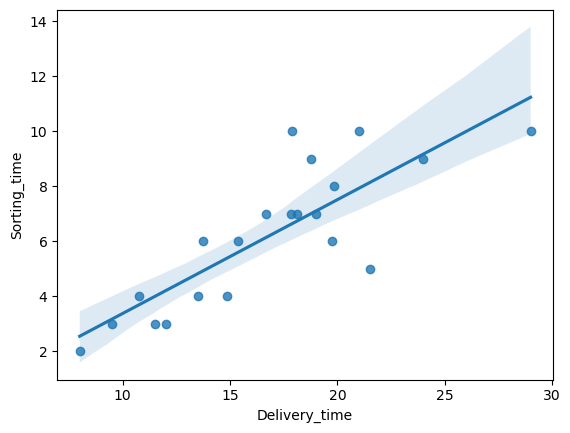

In [14]:
sns.regplot(data = df , x = 'Delivery_time', y = 'Sorting_time');

## Predict for a new data point

In [15]:
pred_df = pd.DataFrame({'Sorting_time':[5,8,9,12]})
pred_df

,Sorting_time
0,5
1,8
2,9
3,12


In [16]:
model.predict(pred_df)

0    14.827833
1    19.774893
2    21.423913
3    26.370973
dtype: float64

# As the sorting time increases , delivery time also increases

#

## Fit a Simple Linear Regression model using sklearn library and apply transformation on the target variable

In [74]:
# differentiate the target variable by applying transformation models like log,sqrt and square and independent variable
x = df.drop('Delivery_time', axis = 1)
y_log = np.log(df['Delivery_time'])
y_sqrt = np.sqrt(df['Delivery_time'])
y_sqre = (df['Delivery_time'])**2

In [76]:
x

,Sorting_time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [77]:
# We are going to build a simple linear regression model by sklearn library
# import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [78]:
# Split the data into rain and test data
x_train_log,x_test_log,y_train_log,y_test_log = train_test_split(x,y_log,test_size=0.2,random_state=42)

In [79]:
# create a linear regression model using sklearn & fit it on the data
lr_log = LinearRegression()
lr_log.fit(x_train_log,y_train_log)

LinearRegression()

In [80]:
# get the prdictions of the model for train and test data observations
pred_train_log = lr_log.predict(x_train_log)
pred_test_log = lr_log.predict(x_test_log)
pred_train_log,pred_test_log

(array([2.76695152, 2.50854604, 3.15455973, 2.25014057, 2.76695152,
        2.37934331, 2.76695152, 3.15455973, 2.63774878, 3.28376247,
        2.89615425, 2.37934331, 3.02535699, 2.37934331, 2.89615425,
        2.89615425]),
 array([3.28376247, 2.89615425, 2.50854604, 2.50854604, 3.28376247]))

In [81]:
lr_log.coef_

array([0.12920274])

In [82]:
lr_log.intercept_

1.9917350969397414

In [83]:
pred_train_log[:5]

array([2.76695152, 2.50854604, 3.15455973, 2.25014057, 2.76695152])

In [84]:
pred_test_log[:5]

array([3.28376247, 2.89615425, 2.50854604, 2.50854604, 3.28376247])

In [85]:
# calculate the mean squared error
from sklearn.metrics import mean_squared_error

In [86]:
mse_train_log = mean_squared_error(y_train_log,pred_train_log,squared = False)
mse_test_log = mean_squared_error(y_test_log,pred_test_log,squared=False)
mse_train_log , mse_test_log

(0.15844539875211913, 0.22888027998185473)

# Apply Square root transoformation to target variable

In [87]:
x_train_sqrt,x_test_sqrt,y_train_sqrt,y_test_sqrt = train_test_split(x,y_sqrt,test_size=0.2,random_state=42)

In [88]:
lr_sqrt = LinearRegression()
lr_sqrt.fit(x_train_sqrt,y_train_sqrt)

LinearRegression()

In [89]:
# get the prdictions of the model for train and test data observations
pred_train_sqrt = lr_sqrt.predict(x_train_sqrt)
pred_test_sqrt = lr_sqrt.predict(x_test_sqrt)
pred_train_sqrt,pred_test_sqrt

(array([4.04635912, 3.54045509, 4.80521515, 3.03455107, 4.04635912,
        3.28750308, 4.04635912, 4.80521515, 3.7934071 , 5.05816716,
        4.29931113, 3.28750308, 4.55226314, 3.28750308, 4.29931113,
        4.29931113]),
 array([5.05816716, 4.29931113, 3.54045509, 3.54045509, 5.05816716]))

In [90]:
lr_sqrt.coef_

array([0.25295201])

In [91]:
lr_sqrt.intercept_

2.5286470410085196

In [92]:
# calculating mean squared errors values
mse_train_sqrt = mean_squared_error(y_train_sqrt,pred_train_sqrt,squared = False)
mse_test_sqrt = mean_squared_error(y_test_sqrt,pred_test_sqrt,squared=False)
mse_train_sqrt , mse_test_sqrt

(0.31663028456788217, 0.45408372621041837)

# Apply Square  transformation to target variable

In [93]:
x_train_sqre,x_test_sqre,y_train_sqre,y_test_sqre = train_test_split(x,y_sqre,test_size=0.2,random_state=42)

In [94]:
lr_sqre = LinearRegression()
lr_sqre.fit(x_train_sqre,y_train_sqre)

LinearRegression()

In [95]:
# get the prdictions of the model for train and test data observations
pred_train_sqre = lr_sqre.predict(x_train_sqre)
pred_test_sqre = lr_sqre.predict(x_test_sqre)
pred_train_sqre,pred_test_sqre

(array([313.2395357 , 174.98159332, 520.62644926,  36.72365095,
        313.2395357 , 105.85262214, 313.2395357 , 520.62644926,
        244.11056451, 589.75542045, 382.36850689, 105.85262214,
        451.49747807, 105.85262214, 382.36850689, 382.36850689]),
 array([589.75542045, 382.36850689, 174.98159332, 174.98159332,
        589.75542045]))

In [96]:
lr_sqre.coef_

array([69.12897119])

In [97]:
lr_sqre.intercept_

-101.53429142656358

In [98]:
# calculating mean squared errors values
mse_train_sqre = mean_squared_error(y_train_sqre,pred_train_sqre,squared = False)
mse_test_sqre = mean_squared_error(y_test_sqre,pred_test_sqre,squared=False)
mse_train_sqre , mse_test_sqre

(110.47695926231172, 141.31025085538624)

# The error is low when we perform square transformational model